# **Predicting Employee Retention**

### Objective

The objective of this assignment is to develop a Logistic Regression model. You will be using this model to analyse and predict binary outcomes based on the input data. This assignment aims to enhance understanding of logistic regression, including its assumptions, implementation, and evaluation, to effectively classify and interpret data.


### Business Objective

A mid-sized technology company wants to improve its understanding of employee retention to foster a loyal and committed workforce. While the organization has traditionally focused on addressing turnover, it recognises the value of proactively identifying employees likely to stay and understanding the factors contributing to their loyalty.


In this assignment you’ll be building a logistic regression model to predict the likelihood of employee retention based on the data such as demographic details, job satisfaction scores, performance metrics, and tenure. The aim is to provide the HR department with actionable insights to strengthen retention strategies, create a supportive work environment, and increase the overall stability and satisfaction of the workforce.

## Assignment Tasks

You need to perform the following steps to complete this assignment:
1. Data Understanding
2. Data Cleaning
3. Train Validation Split
4. EDA on training data
5. EDA on validation data [Optional]
6. Feature Engineering
7. Model Building
8. Prediction and Model Evaluation




## Data Dictionary

The data has 24 Columns and 74610 Rows. Following data dictionary provides the description for each column present in dataset:<br>

<table>
  <thead>
    <tr>
      <th>Column Name</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Employee ID</td>
      <td>A unique identifier assigned to each employee.</td>
    </tr>
    <tr>
      <td>Age</td>
      <td>The age of the employee, ranging from 18 to 60 years.</td>
    </tr>
    <tr>
      <td>Gender</td>
      <td>The gender of the employee.</td>
    </tr>
    <tr>
      <td>Years at Company</td>
      <td>The number of years the employee has been working at the company.</td>
    </tr>
    <tr>
      <td>Monthly Income</td>
      <td>The monthly salary of the employee, in dollars.</td>
    </tr>
    <tr>
      <td>Job Role</td>
      <td>The department or role the employee works in, encoded into categories such as Finance, Healthcare, Technology, Education, and Media.</td>
    </tr>
    <tr>
      <td>Work-Life Balance</td>
      <td>The employee's perceived balance between work and personal life (Poor, Below Average, Good, Excellent).</td>
    </tr>
    <tr>
      <td>Job Satisfaction</td>
      <td>The employee's satisfaction with their job (Very Low, Low, Medium, High).</td>
    </tr>
    <tr>
      <td>Performance Rating</td>
      <td>The employee's performance rating (Low, Below Average, Average, High).</td>
    </tr>
    <tr>
      <td>Number of Promotions</td>
      <td>The total number of promotions the employee has received.</td>
    </tr>
     </tr>
     <tr>
      <td>Overtime</td>
      <td>Number of overtime hours.</td>
    </tr>
    <tr>
      <td>Distance from Home</td>
      <td>The distance between the employee's home and workplace, in miles.</td>
    </tr>
    <tr>
      <td>Education Level</td>
      <td>The highest education level attained by the employee (High School, Associate Degree, Bachelor’s Degree, Master’s Degree, PhD).</td>
    </tr>
    <tr>
      <td>Marital Status</td>
      <td>The marital status of the employee (Divorced, Married, Single).</td>
    </tr>
     <tr>
      <td>Number of Dependents</td>
      <td>Number of dependents the employee has.</td>
    </tr>
    <tr>
      <td>Job Level</td>
      <td>The job level of the employee (Entry, Mid, Senior).</td>
    </tr>
    <tr>
      <td>Company Size</td>
      <td>The size of the company the employee works for (Small, Medium, Large).</td>
    </tr>
    <tr>
      <td>Company Tenure (In Months)</td>
      <td>The total number of years the employee has been working in the industry.</td>
    </tr>
    <tr>
      <td>Remote Work</td>
      <td>Whether the employee works remotely (Yes or No).</td>
    </tr>
    <tr>
      <td>Leadership Opportunities</td>
      <td>Whether the employee has leadership opportunities (Yes or No).</td>
    </tr>
    <tr>
      <td>Innovation Opportunities</td>
      <td>Whether the employee has opportunities for innovation (Yes or No).</td>
    </tr>
    <tr>
      <td>Company Reputation</td>
      <td>The employee's perception of the company's reputation (Very Poor, Poor, Good, Excellent).</td>
    </tr>
    <tr>
      <td>Employee Recognition</td>
      <td>The level of recognition the employee receives(Very Low, Low, Medium, High).</td>
    </tr>
    <tr>
      <td>Attrition</td>
      <td>Whether the employee has left the company.</td>
    </tr>
  </tbody>
</table>


## **1. Data Understanding**

In this step, load the dataset and check basic statistics of the data, including preview of data, dimension of data, column descriptions and data types.

### **1.0 Import Libraries**

In [1]:
# Supress unnecessary warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Import the libraries
import numpy as np
import pandas as pd

### **1.1 Load the Data**

In [5]:
# Load the dataset
employee_data=pd.read_csv("Employee_data.csv")


In [7]:
# Check the first few entries
employee_data.head()

Employee ID  Age  Gender  Years at Company    Job Role  Monthly Income  \
0         8410   31    Male                19   Education            5390   
1        64756   59  Female                 4       Media            5534   
2        30257   24  Female                10  Healthcare            8159   
3        65791   36  Female                 7   Education            3989   
4        65026   56    Male                41   Education            4821   

  Work-Life Balance Job Satisfaction Performance Rating  Number of Promotions  \
0         Excellent           Medium            Average                     2   
1              Poor             High                Low                     3   
2              Good             High                Low                     0   
3              Good             High               High                     1   
4              Fair        Very High            Average                     0   

   ... Number of Dependents  Job Level Company Size  \
0  ...                    0        Mid       Medium   
1  ...                    3        Mid       Medium   
2  ...                    3        Mid       Medium   
3  ...                    2        Mid        Small   
4  ...                    0     Senior       Medium   

  Company Tenure (In Months)  Remote Work Leadership Opportunities  \
0                       89.0           No                       No   
1                       21.0           No                       No   
2                       74.0           No                       No   
3                       50.0          Yes                       No   
4                       68.0           No                       No   

  Innovation Opportunities  Company Reputation Employee Recognition Attrition  
0                       No           Excellent               Medium    Stayed  
1                       No                Fair                  Low    Stayed  
2                       No                Poor                  Low    Stayed  
3                       No                Good               Medium    Stayed  
4                       No                Fair               Medium    Stayed  

[5 rows x 24 columns]

In [9]:
# Inspect the shape of the dataset
employee_data.shape

(74610, 24)

In [11]:
# Inspect the different columns in the dataset
employee_data.columns


Index(['Employee ID', 'Age', 'Gender', 'Years at Company', 'Job Role',
       'Monthly Income', 'Work-Life Balance', 'Job Satisfaction',
       'Performance Rating', 'Number of Promotions', 'Overtime',
       'Distance from Home', 'Education Level', 'Marital Status',
       'Number of Dependents', 'Job Level', 'Company Size',
       'Company Tenure (In Months)', 'Remote Work', 'Leadership Opportunities',
       'Innovation Opportunities', 'Company Reputation',
       'Employee Recognition', 'Attrition'],
      dtype='object')

### **1.2 Check the basic statistics**

In [13]:
# Check the summary of the dataset
employee_data.describe()

Employee ID           Age  Years at Company  Monthly Income  \
count  74610.000000  74610.000000      74610.000000    74610.000000   
mean   37246.028696     38.529379         15.722638     7344.931417   
std    21505.785344     12.082299         11.224059     2596.373589   
min        1.000000     18.000000          1.000000     1226.000000   
25%    18624.250000     28.000000          7.000000     5652.000000   
50%    37239.500000     39.000000         13.000000     7348.500000   
75%    55871.750000     49.000000         23.000000     8876.000000   
max    74498.000000     59.000000         51.000000    50030.000000   

       Number of Promotions  Distance from Home  Number of Dependents  \
count          74610.000000        72698.000000          74610.000000   
mean               0.832958           49.990839              1.657432   
std                0.995326           28.519135              1.579862   
min                0.000000            1.000000              0.000000   
25%                0.000000           25.000000              0.000000   
50%                1.000000           50.000000              1.000000   
75%                2.000000           75.000000              3.000000   
max                4.000000           99.000000             15.000000   

       Company Tenure (In Months)  
count                72197.000000  
mean                    55.711899  
std                     25.392325  
min                      2.000000  
25%                     36.000000  
50%                     56.000000  
75%                     76.000000  
max                    128.000000

### **1.3 Check the data type of columns**

In [15]:
# Check the info to see the types of the feature variables and the null values present
employee_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74610 entries, 0 to 74609
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee ID                 74610 non-null  int64  
 1   Age                         74610 non-null  int64  
 2   Gender                      74610 non-null  object 
 3   Years at Company            74610 non-null  int64  
 4   Job Role                    74610 non-null  object 
 5   Monthly Income              74610 non-null  int64  
 6   Work-Life Balance           74610 non-null  object 
 7   Job Satisfaction            74610 non-null  object 
 8   Performance Rating          74610 non-null  object 
 9   Number of Promotions        74610 non-null  int64  
 10  Overtime                    74610 non-null  object 
 11  Distance from Home          72698 non-null  float64
 12  Education Level             74610 non-null  object 
 13  Marital Status              746

## **2. Data Cleaning** <font color = red>[15 marks]</font>

### **2.1 Handle the missing values** <font color = red>[10 marks]</font>

2.1.1 Check the number of missing values <font color="red">[2 Mark]</font>

In [17]:
# Check the number of missing values in each column
employee_data.isnull().sum()

Employee ID                      0
Age                              0
Gender                           0
Years at Company                 0
Job Role                         0
Monthly Income                   0
Work-Life Balance                0
Job Satisfaction                 0
Performance Rating               0
Number of Promotions             0
Overtime                         0
Distance from Home            1912
Education Level                  0
Marital Status                   0
Number of Dependents             0
Job Level                        0
Company Size                     0
Company Tenure (In Months)    2413
Remote Work                      0
Leadership Opportunities         0
Innovation Opportunities         0
Company Reputation               0
Employee Recognition             0
Attrition                        0
dtype: int64

2.1.2 Check the percentage of missing values <font color="red">[2 Marks]</font>

In [19]:
# Check the percentage of missing values in each column
employee_data.isnull().mean()*100

Employee ID                   0.000000
Age                           0.000000
Gender                        0.000000
Years at Company              0.000000
Job Role                      0.000000
Monthly Income                0.000000
Work-Life Balance             0.000000
Job Satisfaction              0.000000
Performance Rating            0.000000
Number of Promotions          0.000000
Overtime                      0.000000
Distance from Home            2.562659
Education Level               0.000000
Marital Status                0.000000
Number of Dependents          0.000000
Job Level                     0.000000
Company Size                  0.000000
Company Tenure (In Months)    3.234151
Remote Work                   0.000000
Leadership Opportunities      0.000000
Innovation Opportunities      0.000000
Company Reputation            0.000000
Employee Recognition          0.000000
Attrition                     0.000000
dtype: float64

2.1.3 Handle rows with missing values <font color="red">[4 Marks]</font>

In [21]:
# Handle the missing value rows in the column
employee_data_cleaned=employee_data.dropna()

2.1.4 Check percentage of remaning data after missing values are removed <font color="red">[2 Mark]</font>

In [23]:
# Check the percentage of remaining data after missing values are removed
remaining_percentage = (len(employee_data_cleaned) / len(employee_data)) * 100
remaining_percentage

94.67229593888219

### **2.2 Identify and handle redundant values within categorical columns (if any)** <font color = red>[3 marks]</font>

Examine the categorical columns to determine if any value or column needs to be treated

In [25]:
# Write a function to display the categorical columns with their unique values and check for redundant values

def inspect_categorical_columns(df):
    """
    Displays all categorical columns with their unique values and checks for redundancies.
    """
    print("Inspecting Categorical Columns:\n")
    categorical_cols = df.select_dtypes(include=['object'])

    for col in categorical_cols.columns:
        print(f"Column: {col}")
        unique_vals = categorical_cols[col].unique()
        print(f"Unique Values ({len(unique_vals)}): {unique_vals}\n")

        # Check for redundant entries (case-insensitive duplicates)
        lowercased = [str(val).lower().strip() for val in unique_vals]
        if len(lowercased) != len(set(lowercased)):
            print(f"Potential redundant or inconsistent values found in '{col}'\n")


inspect_categorical_columns(employee_data_cleaned)


Inspecting Categorical Columns:

Column: Gender
Unique Values (2): ['Male' 'Female']

Column: Job Role
Unique Values (5): ['Education' 'Media' 'Healthcare' 'Technology' 'Finance']

Column: Work-Life Balance
Unique Values (4): ['Excellent' 'Poor' 'Good' 'Fair']

Column: Job Satisfaction
Unique Values (4): ['Medium' 'High' 'Very High' 'Low']

Column: Performance Rating
Unique Values (4): ['Average' 'Low' 'High' 'Below Average']

Column: Overtime
Unique Values (2): ['No' 'Yes']

Column: Education Level
Unique Values (5): ['Associate Degree' 'Masterâ€™s Degree' 'Bachelorâ€™s Degree'
 'High School' 'PhD']

Column: Marital Status
Unique Values (3): ['Married' 'Divorced' 'Single']

Column: Job Level
Unique Values (3): ['Mid' 'Senior' 'Entry']

Column: Company Size
Unique Values (3): ['Medium' 'Small' 'Large']

Column: Remote Work
Unique Values (2): ['No' 'Yes']

Column: Leadership Opportunities
Unique Values (2): ['No' 'Yes']

Column: Innovation Opportunities
Unique Values (2): ['No' 'Yes']



In [27]:
# Check the data
employee_data_cleaned.head()

Employee ID  Age  Gender  Years at Company    Job Role  Monthly Income  \
0         8410   31    Male                19   Education            5390   
1        64756   59  Female                 4       Media            5534   
2        30257   24  Female                10  Healthcare            8159   
3        65791   36  Female                 7   Education            3989   
4        65026   56    Male                41   Education            4821   

  Work-Life Balance Job Satisfaction Performance Rating  Number of Promotions  \
0         Excellent           Medium            Average                     2   
1              Poor             High                Low                     3   
2              Good             High                Low                     0   
3              Good             High               High                     1   
4              Fair        Very High            Average                     0   

   ... Number of Dependents  Job Level Company Size  \
0  ...                    0        Mid       Medium   
1  ...                    3        Mid       Medium   
2  ...                    3        Mid       Medium   
3  ...                    2        Mid        Small   
4  ...                    0     Senior       Medium   

  Company Tenure (In Months)  Remote Work Leadership Opportunities  \
0                       89.0           No                       No   
1                       21.0           No                       No   
2                       74.0           No                       No   
3                       50.0          Yes                       No   
4                       68.0           No                       No   

  Innovation Opportunities  Company Reputation Employee Recognition Attrition  
0                       No           Excellent               Medium    Stayed  
1                       No                Fair                  Low    Stayed  
2                       No                Poor                  Low    Stayed  
3                       No                Good               Medium    Stayed  
4                       No                Fair               Medium    Stayed  

[5 rows x 24 columns]

### **2.3 Drop redundant columns** <font color = red>[2 marks]</font>

In [29]:
# Drop redundant columns which are not required for modelling
columns_to_drop = [
    'Employee ID',          # Employee ID is unique and won't help in prediction.
    'Years at Company',  #  as it is making no sense here 
]
cleaned_employee_data = employee_data_cleaned.drop(columns=columns_to_drop)

In [31]:
# Check first few rows of data
cleaned_employee_data.head()

Age  Gender    Job Role  Monthly Income Work-Life Balance Job Satisfaction  \
0   31    Male   Education            5390         Excellent           Medium   
1   59  Female       Media            5534              Poor             High   
2   24  Female  Healthcare            8159              Good             High   
3   36  Female   Education            3989              Good             High   
4   56    Male   Education            4821              Fair        Very High   

  Performance Rating  Number of Promotions Overtime  Distance from Home  ...  \
0            Average                     2       No                22.0  ...   
1                Low                     3       No                21.0  ...   
2                Low                     0       No                11.0  ...   
3               High                     1       No                27.0  ...   
4            Average                     0      Yes                71.0  ...   

  Number of Dependents Job Level  Company Size Company Tenure (In Months)  \
0                    0       Mid        Medium                       89.0   
1                    3       Mid        Medium                       21.0   
2                    3       Mid        Medium                       74.0   
3                    2       Mid         Small                       50.0   
4                    0    Senior        Medium                       68.0   

  Remote Work  Leadership Opportunities Innovation Opportunities  \
0          No                        No                       No   
1          No                        No                       No   
2          No                        No                       No   
3         Yes                        No                       No   
4          No                        No                       No   

  Company Reputation Employee Recognition Attrition  
0          Excellent               Medium    Stayed  
1               Fair                  Low    Stayed  
2               Poor                  Low    Stayed  
3               Good               Medium    Stayed  
4               Fair               Medium    Stayed  

[5 rows x 22 columns]

## **3. Train-Validation Split** <font color = red>[5 marks]</font>

### **3.1 Import required libraries**

In [33]:
# Import Train Test Split
from sklearn.model_selection import train_test_split

### **3.2 Define feature and target variables** <font color = red>[2 Mark]</font>

In [35]:
# Put all the feature variables in X
X=cleaned_employee_data.drop('Attrition',axis=1)
# Put the target variable in y
y = cleaned_employee_data['Attrition'] 

### **3.3 Split the data** <font color="red">[3 Marks]</font>

In [37]:
# Split the data into 70% train data and 30% validation data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## **4. EDA on training data** <font color = red>[20 marks]</font>

### **4.1 Perform univariate analysis** <font color = red>[6 marks]</font>

Perform univariate analysis on training data for all the numerical columns.




4.1.1 Select numerical columns from training data <font color = "red">[1 Mark]</font>

In [39]:
# Select numerical columns
X_train_num = X_train.select_dtypes(include=['int64', 'float64'])

4.1.2 Plot distribution of numerical columns <font color = "red">[5 Marks]</font>

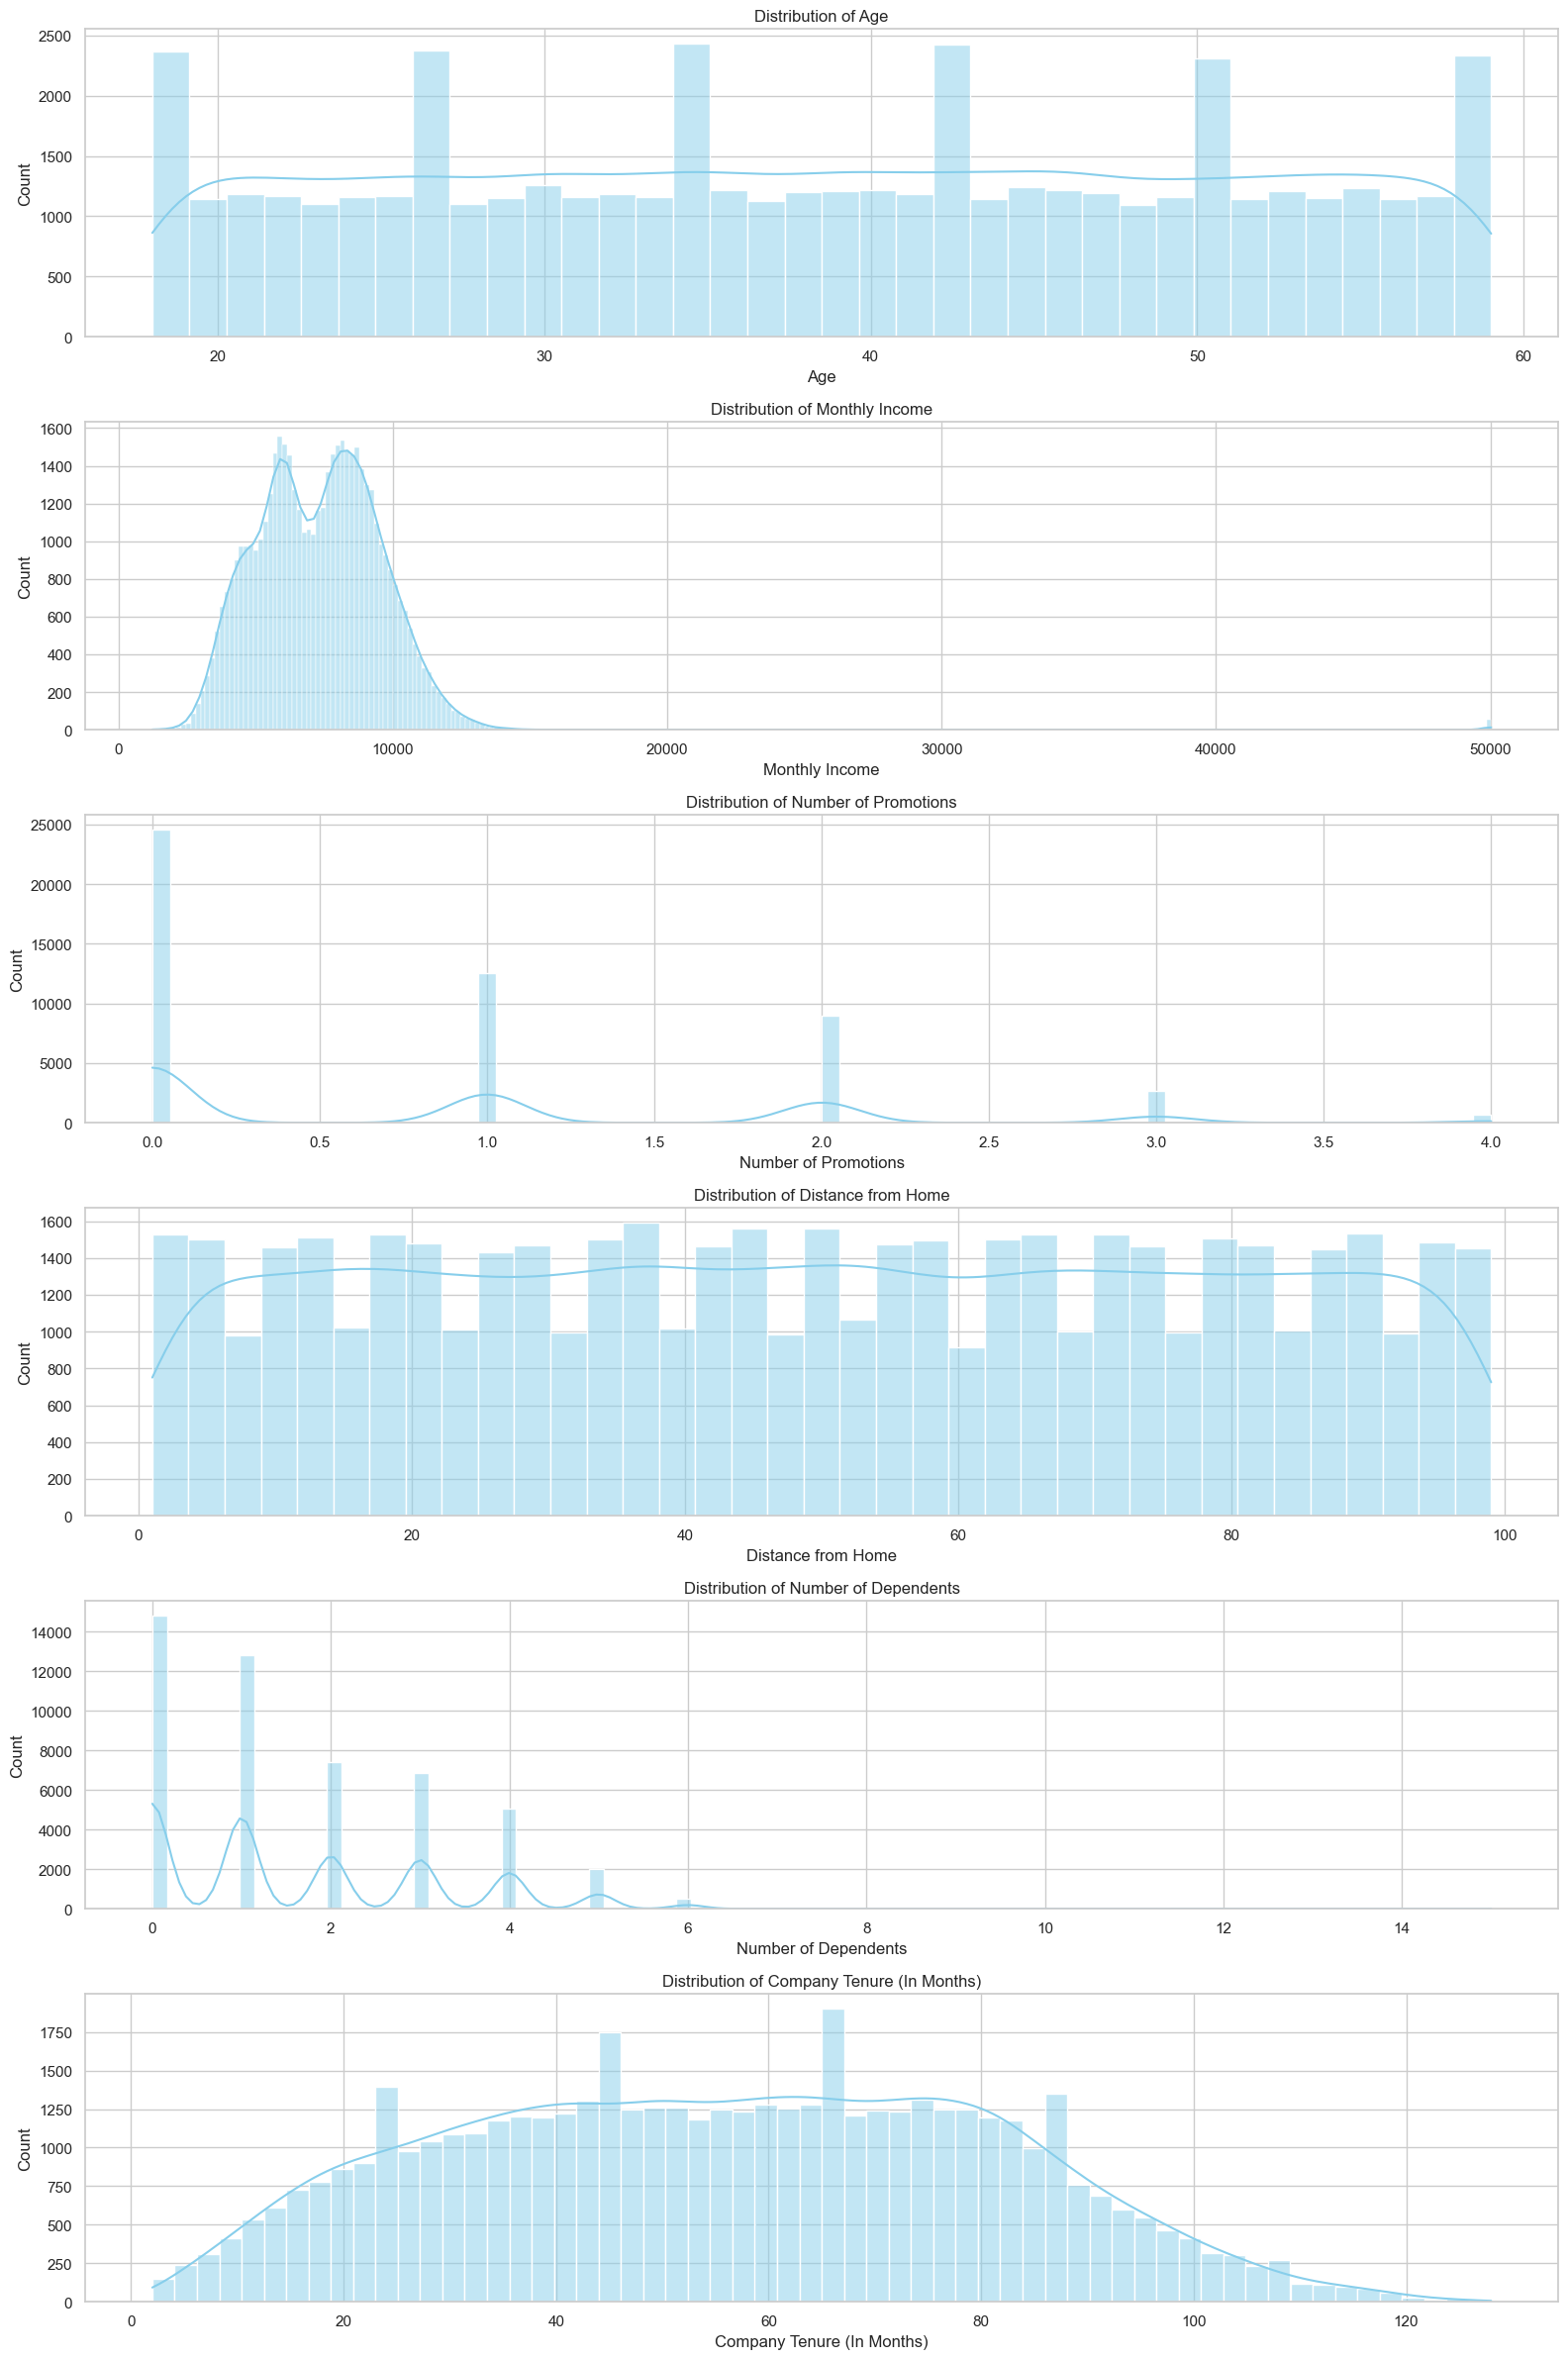

In [41]:
# Plot all the numerical columns to understand their distribution

# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Set plot style
sns.set(style='whitegrid')
plt.figure(figsize=(16, 4 * len(X_train_num.columns)))  # dynamic height based on number of columns

# Loop through numerical columns and create a distribution plot for each
for i, col in enumerate(X_train_num.columns, 1):
    plt.subplot(len(X_train_num.columns), 1, i)
    sns.histplot(X_train_num[col], kde=True, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.tight_layout()
plt.show()


### **4.2 Perform correlation analysis** <font color="red">[4 Marks]</font>

Check the correlation among different numerical variables.

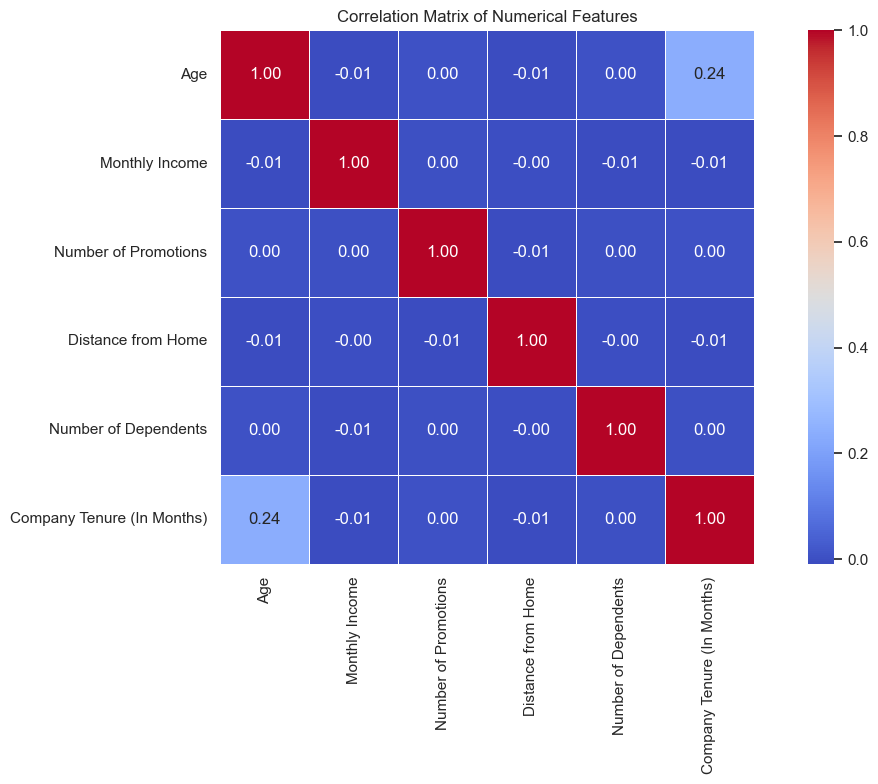

In [43]:
# Create correlation matrix for numerical columns
corr_matrix = X_train_num.corr()
# Plot Heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(
    corr_matrix,
    annot=True,         # Show correlation coefficients
    fmt=".2f",          # Limit to 2 decimal places
    cmap='coolwarm',    # Color gradient
    square=True,        # Square-shaped cells
    linewidths=0.5      # Add grid lines
)

# Add title
plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.show()

### **4.3 Check class balance** <font color="red">[2 Marks]</font>

Check the distribution of target variable in training set to check class balance.

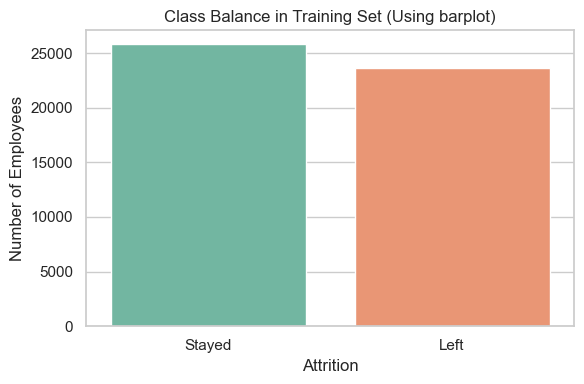

In [45]:
# Plot a bar chart to check class balance
import seaborn as sns
import matplotlib.pyplot as plt

# Create a DataFrame with counts
attrition_counts = y_train.value_counts().reset_index()
attrition_counts.columns = ['Attrition', 'Count']

# Plot using barplot
plt.figure(figsize=(6, 4))
sns.barplot(x='Attrition', y='Count', data=attrition_counts, palette='Set2')

plt.title('Class Balance in Training Set (Using barplot)')
plt.xlabel('Attrition')
plt.ylabel('Number of Employees')
plt.tight_layout()
plt.show()



### **4.4 Perform bivariate analysis** <font color="red">[8 Marks]</font>

Perform bivariate analysis on training data between all the categorical columns and target variable to  analyse how the categorical variables influence the target variable.

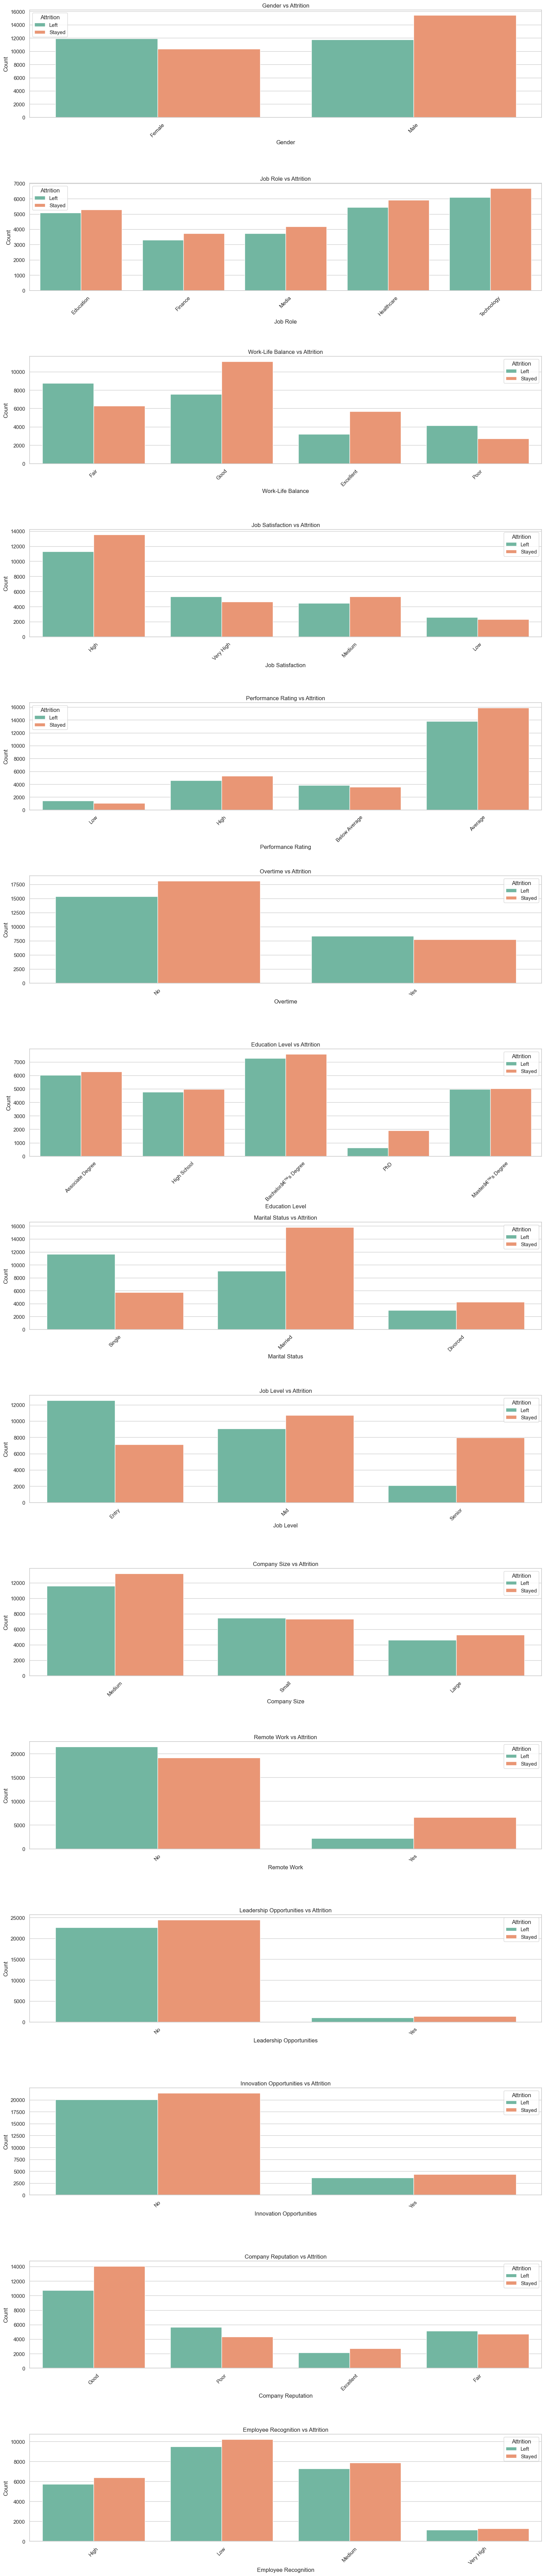

In [47]:
# Plot distribution for each categorical column with target variable

# Set the plot style
sns.set(style="whitegrid")

# Combine X_train and y_train so we can access both feature and target in one DataFrame
train_data = X_train.copy()
train_data['Attrition'] = y_train

# Get all categorical columns
categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns

# Set up the figure
plt.figure(figsize=(16, 5 * len(categorical_cols)))

# Loop and plot
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(len(categorical_cols), 1, i)
    sns.countplot(data=train_data, x=col, hue='Attrition', palette='Set2')
    plt.title(f'{col} vs Attrition')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()

plt.show()

## **5. EDA on validation data** <font color = red>[OPTIONAL]</font>

### **5.1 Perform univariate analysis**

Perform univariate analysis on validation data for all the numerical columns.


5.1.1 Select numerical columns from validation data

In [49]:
# Select numerical columns
X_val_num = X_test.select_dtypes(include=['int64', 'float64'])


5.1.2 Plot distribution of numerical columns

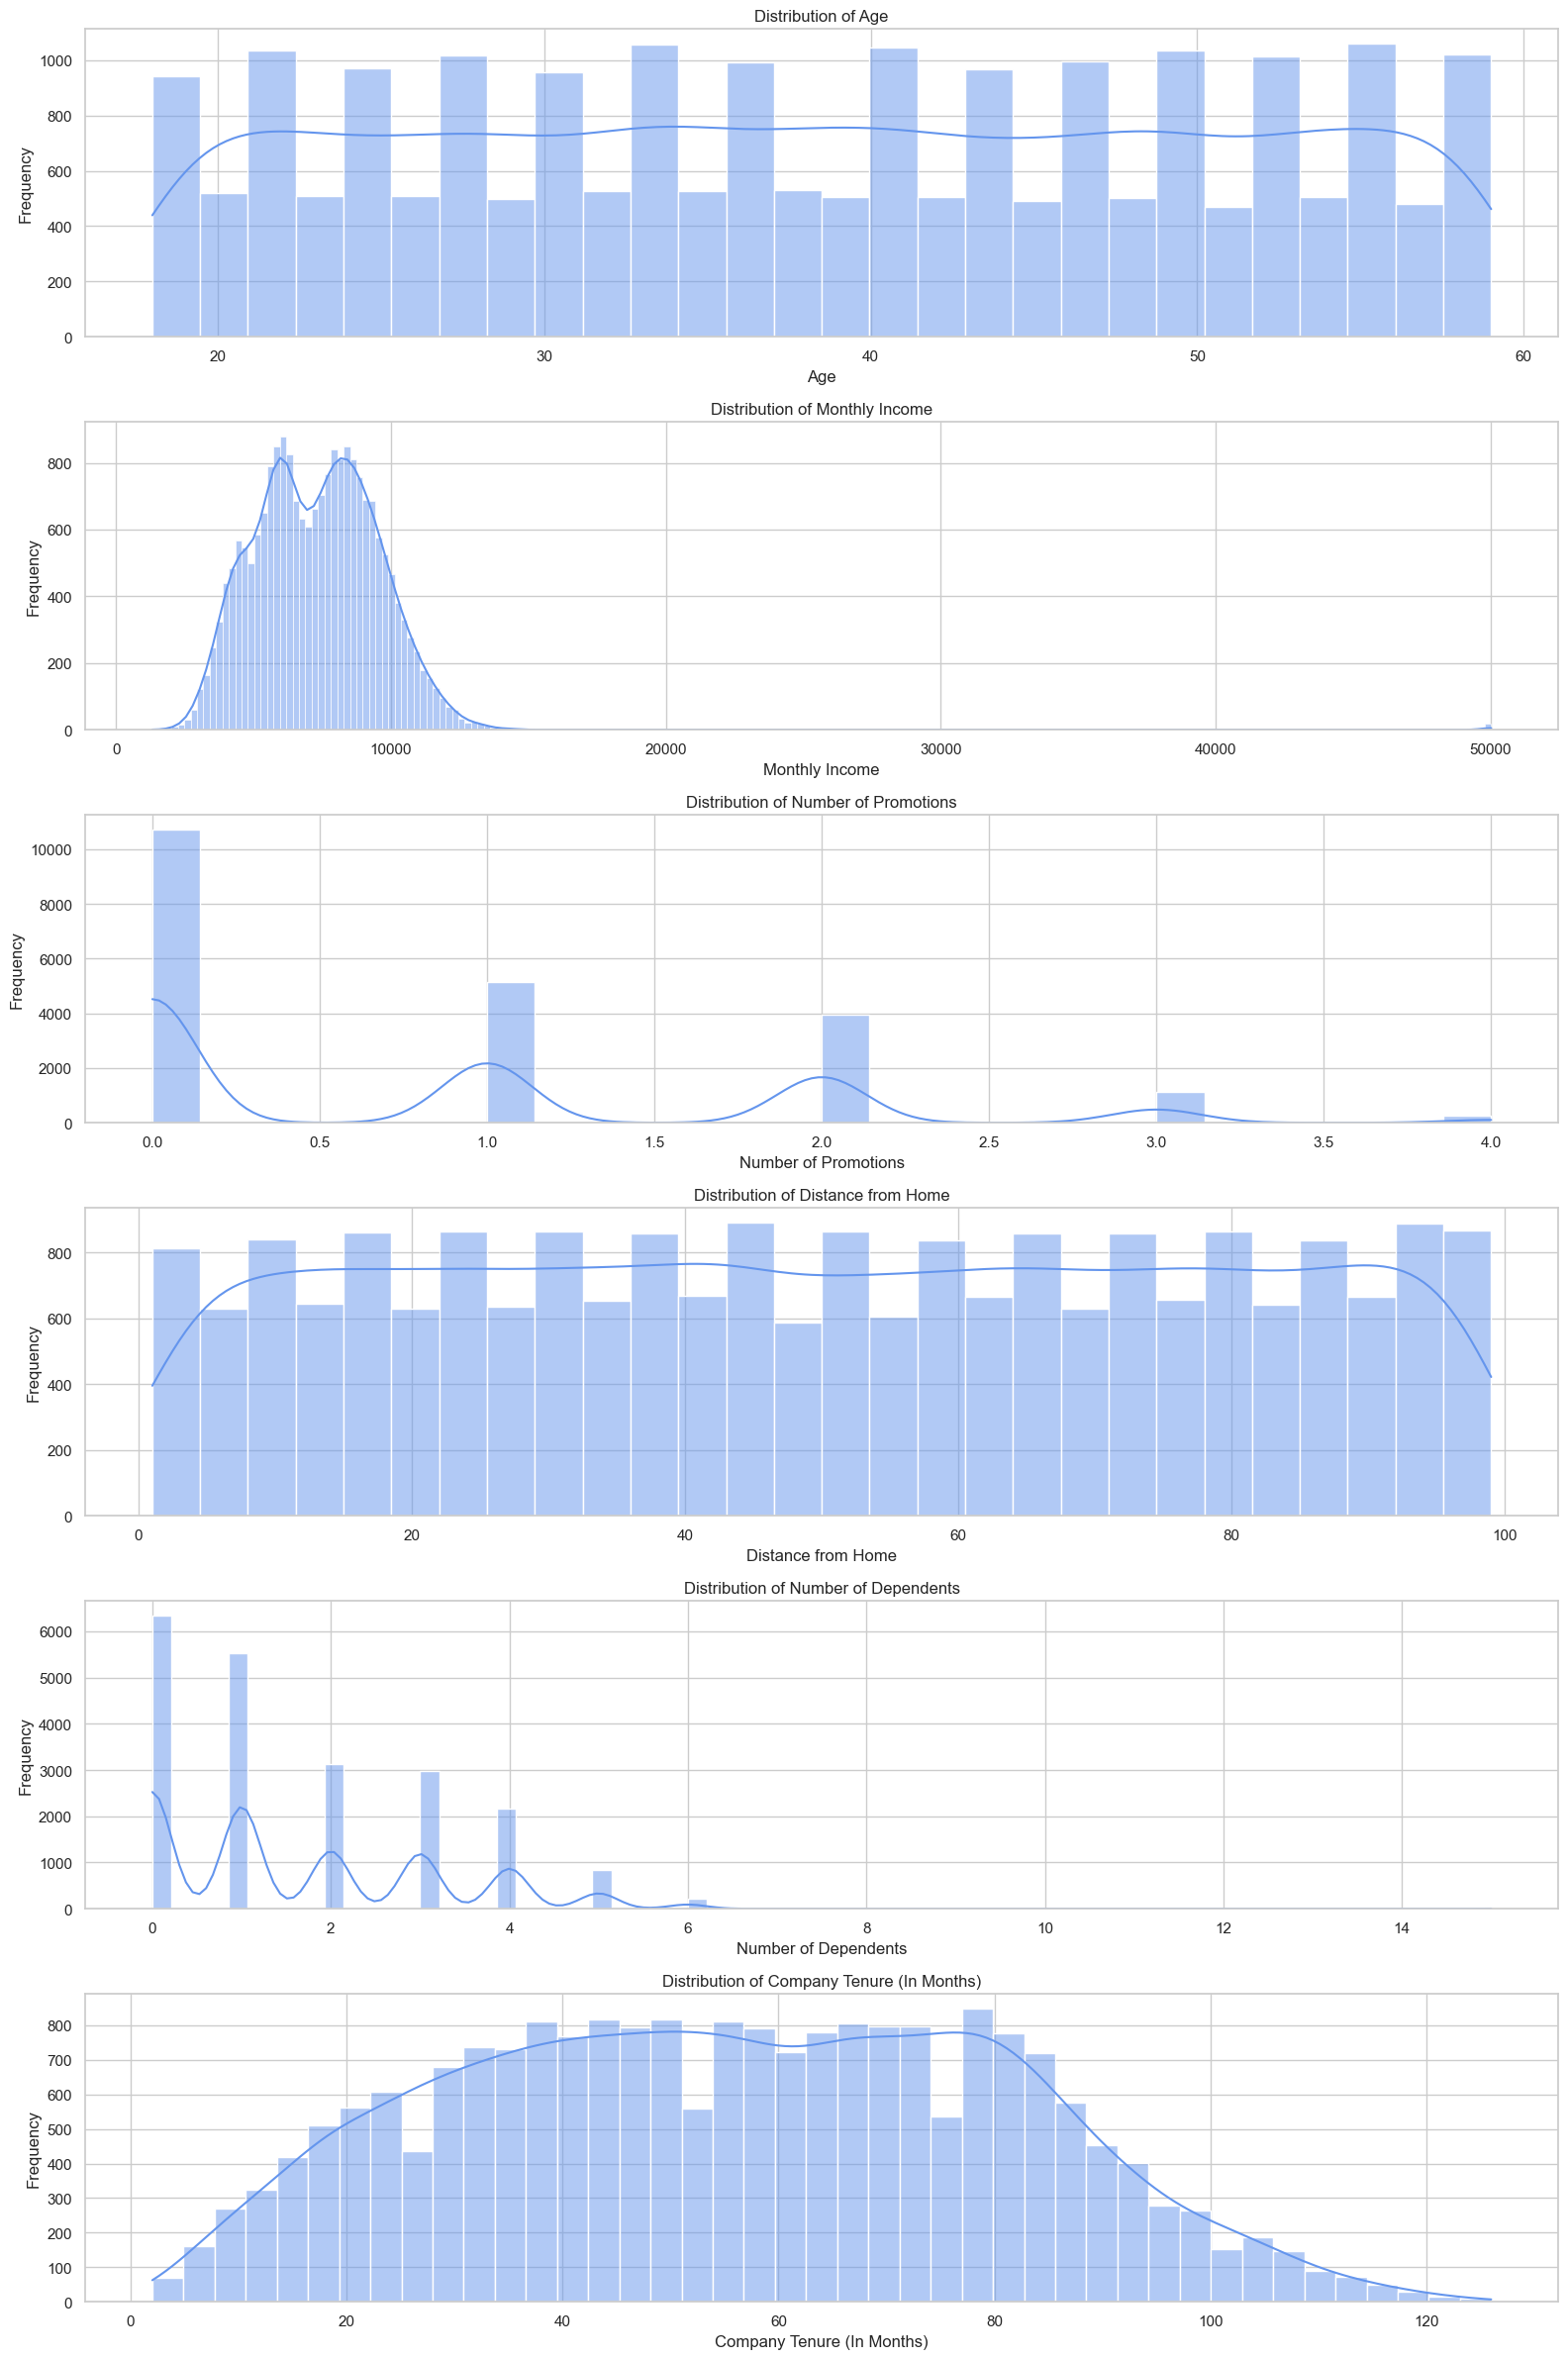

In [51]:
# Plot all the numerical columns to understand their distribution
# Set the plot style
sns.set(style='whitegrid')

# Adjust figure height based on number of numerical columns
plt.figure(figsize=(16, 4 * len(X_val_num.columns)))

# Loop through each numerical column and plot its distribution
for i, col in enumerate(X_val_num.columns, 1):
    plt.subplot(len(X_val_num.columns), 1, i)
    sns.histplot(X_val_num[col], kde=True, color='cornflowerblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()

plt.show()

### **5.2 Perform correlation analysis**

Check the correlation among different numerical variables.

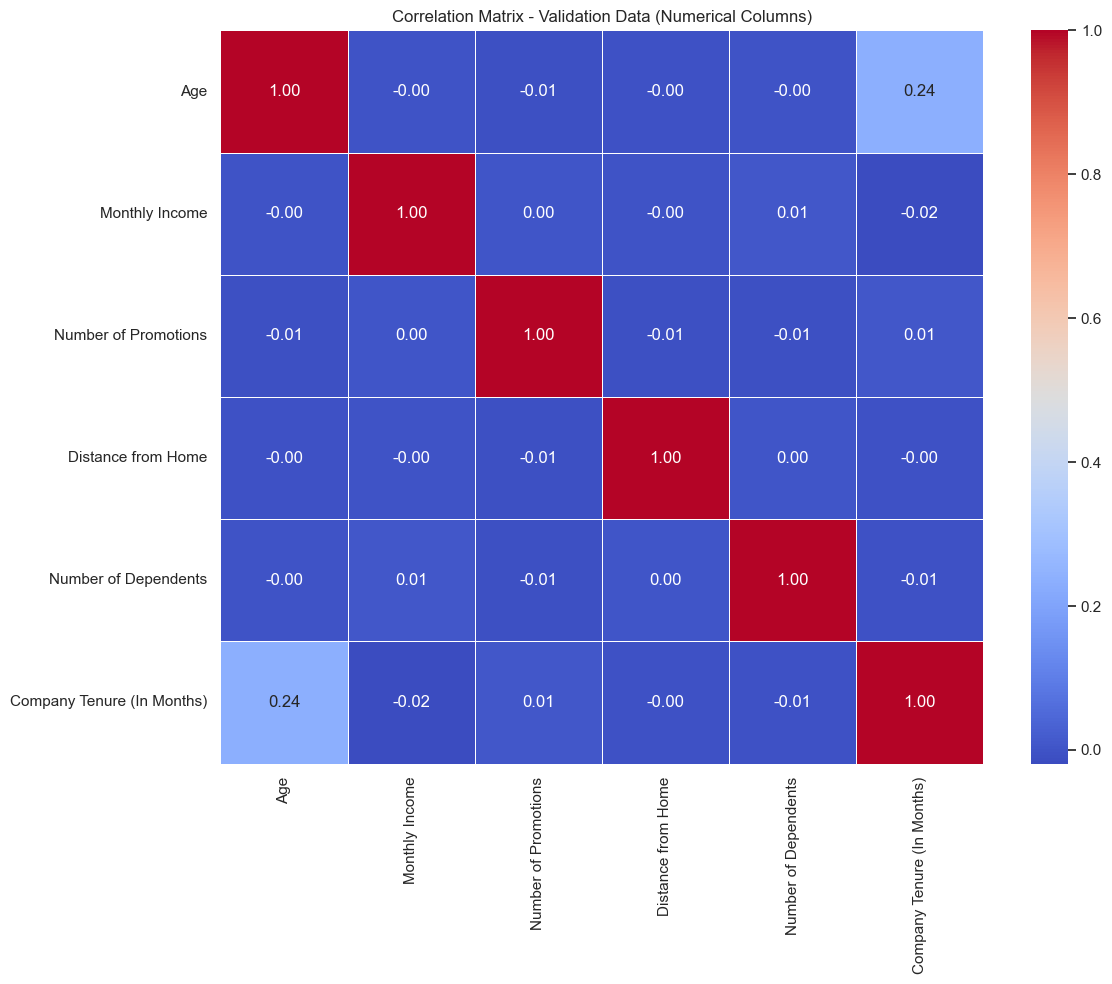

In [53]:
# Create correlation matrix for numerical columns
corr_matrix = X_val_num.corr()

# Plot Heatmap of the correlation matrix
plt.figure(figsize=(12, 10))

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title("Correlation Matrix - Validation Data (Numerical Columns)")

plt.tight_layout()
plt.show()

### **5.3 Check class balance**

Check the distribution of target variable in validation data to check class balance.

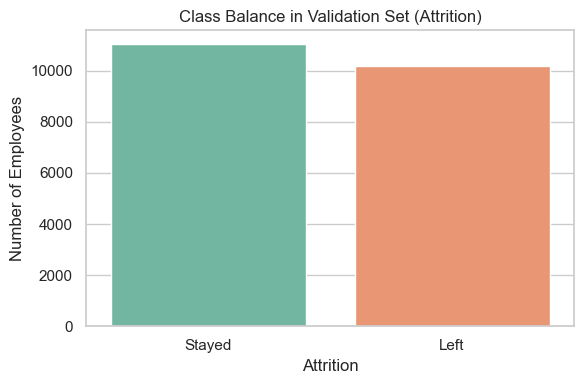

In [55]:
# Plot a bar chart to check class balance
plt.figure(figsize=(6, 4))
sns.countplot(x=y_test, palette='Set2')
plt.title('Class Balance in Validation Set (Attrition)')
plt.xlabel('Attrition')
plt.ylabel('Number of Employees')

plt.tight_layout()
plt.show()

### **5.4 Perform bivariate analysis**

Perform bivariate analysis on validation data between all the categorical columns and target variable to analyse how the categorical variables influence the target variable.

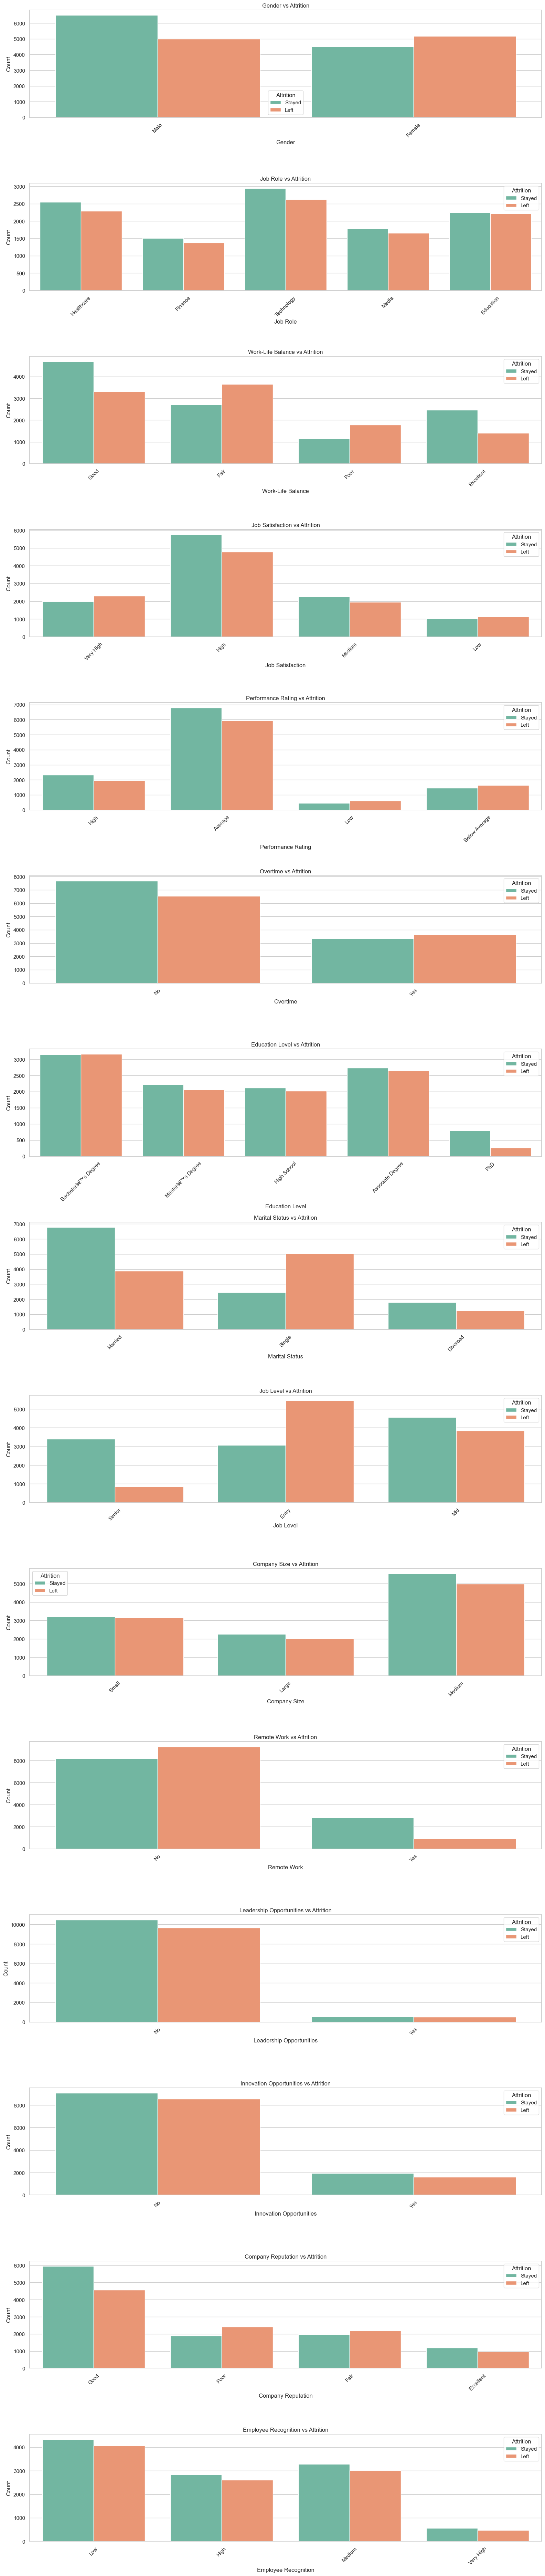

In [57]:
# Plot distribution for each categorical column with target variable

val_data = X_test.copy()
val_data['Attrition'] = y_test

categorical_cols_val = X_test.select_dtypes(include=['object', 'category']).columns

sns.set(style='whitegrid')

plt.figure(figsize=(16, 5 * len(categorical_cols_val)))


for i, col in enumerate(categorical_cols_val, 1):
    plt.subplot(len(categorical_cols_val), 1, i)
    sns.countplot(data=val_data, x=col, hue='Attrition', palette='Set2')
    plt.title(f'{col} vs Attrition')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()

plt.show()


## **6. Feature Engineering** <font color = red>[20 marks]</font>

### **6.1 Dummy variable creation** <font color = red>[15 marks]</font>


The next step is to deal with the categorical variables present in the data.

6.1.1 Identify categorical columns where dummy variables are required <font color="red">[1 Mark]</font>

In [59]:
# Check the categorical columns
categorical_cols = X_train.select_dtypes(include=['object', 'category'])
cols_for_dummies = [col for col in categorical_cols.columns if categorical_cols[col].nunique() > 1]
print("Columns that need dummy variables:")
print(cols_for_dummies)

Columns that need dummy variables:
['Gender', 'Job Role', 'Work-Life Balance', 'Job Satisfaction', 'Performance Rating', 'Overtime', 'Education Level', 'Marital Status', 'Job Level', 'Company Size', 'Remote Work', 'Leadership Opportunities', 'Innovation Opportunities', 'Company Reputation', 'Employee Recognition']


6.1.2 Create dummy variables for independent columns in training set <font color="red">[3 Marks]</font>

In [61]:
# Create dummy variables using the 'get_dummies' for independent columns
X_train_dummies = pd.get_dummies(X_train[cols_for_dummies], drop_first=True,dtype=int)
# Add the results to the master DataFrame
X_train_processed = pd.concat([X_train, X_train_dummies], axis=1)

Now, drop the original categorical columns and check the DataFrame

In [63]:
# Drop the original categorical columns and check the DataFrame
X_train_final =X_train_processed.drop(columns=cols_for_dummies)
X_train_final

Age  Monthly Income  Number of Promotions  Distance from Home  \
41465   46            4617                     2                59.0   
69350   43            4447                     3                64.0   
28247   27            9762                     0                84.0   
3217    47            5244                     2                59.0   
73636   25            4455                     0                36.0   
...    ...             ...                   ...                 ...   
39742   57            5620                     0                41.0   
7084    34           10901                     0                57.0   
58283   40            6338                     0                90.0   
1679    47            5165                     0                70.0   
17472   49            8452                     1                65.0   

       Number of Dependents  Company Tenure (In Months)  Gender_Male  \
41465                     2                        92.0            0   
69350                     0                       103.0            1   
28247                     1                        16.0            1   
3217                      1                        74.0            0   
73636                     0                        62.0            0   
...                     ...                         ...          ...   
39742                     3                        78.0            1   
7084                      1                        23.0            1   
58283                     0                        68.0            0   
1679                      0                        65.0            1   
17472                     1                        19.0            1   

       Job Role_Finance  Job Role_Healthcare  Job Role_Media  ...  \
41465                 0                    0               0  ...   
69350                 0                    0               0  ...   
28247                 1                    0               0  ...   
3217                  0                    0               1  ...   
73636                 0                    0               0  ...   
...                 ...                  ...             ...  ...   
39742                 0                    0               1  ...   
7084                  1                    0               0  ...   
58283                 0                    1               0  ...   
1679                  0                    0               0  ...   
17472                 0                    1               0  ...   

       Company Size_Small  Remote Work_Yes  Leadership Opportunities_Yes  \
41465                   0                0                             0   
69350                   1                0                             0   
28247                   0                0                             0   
3217                    0                0                             0   
73636                   0                0                             0   
...                   ...              ...                           ...   
39742                   0                0                             0   
7084                    0                0                             0   
58283                   0                1                             0   
1679                    1                0                             0   
17472                   1                0                             0   

       Innovation Opportunities_Yes  Company Reputation_Fair  \
41465                             0                        0   
69350                             1                        0   
28247                             1                        0   
3217                              0                        0   
73636                             0                        0   
...                             ...                      ...   
39742                             0                        0   
7084                   

6.1.3 Create dummy variables for independent columns in validation set <font color="red">[3 Marks]</font>

In [65]:
# Create dummy variables using the 'get_dummies' for independent columns
X_test_dummies = pd.get_dummies(X_test[cols_for_dummies], drop_first=True,dtype=int)
# Add the results to the master DataFrame
X_test_processed = pd.concat([X_test, X_test_dummies], axis=1)

Now, drop the original categorical columns and check the DataFrame

In [67]:
# Drop categorical columns and check the DataFrame
X_test_final =X_test_processed.drop(columns=cols_for_dummies)
X_test_final

Age  Monthly Income  Number of Promotions  Distance from Home  \
23813   46            7740                     3                78.0   
14537   32            8779                     1                91.0   
45192   53           11683                     1                71.0   
13765   50            7305                     2                71.0   
3411    48           10114                     0                 2.0   
...    ...             ...                   ...                 ...   
2935    18            6754                     1                23.0   
34620   41            6291                     0                30.0   
59046   37            7746                     1                11.0   
33090   22           10700                     2                26.0   
19820   36            5717                     1                30.0   

       Number of Dependents  Company Tenure (In Months)  Gender_Male  \
23813                     2                         3.0            1   
14537                     0                        35.0            1   
45192                     1                        39.0            1   
13765                     1                         3.0            0   
3411                      1                        64.0            1   
...                     ...                         ...          ...   
2935                      2                        15.0            1   
34620                     0                        24.0            0   
59046                     2                        42.0            0   
33090                     2                        75.0            0   
19820                     1                        37.0            0   

       Job Role_Finance  Job Role_Healthcare  Job Role_Media  ...  \
23813                 0                    1               0  ...   
14537                 1                    0               0  ...   
45192                 0                    0               0  ...   
13765                 0                    0               0  ...   
3411                  0                    1               0  ...   
...                 ...                  ...             ...  ...   
2935                  0                    0               0  ...   
34620                 0                    0               0  ...   
59046                 0                    1               0  ...   
33090                 0                    0               0  ...   
19820                 0                    0               1  ...   

       Company Size_Small  Remote Work_Yes  Leadership Opportunities_Yes  \
23813                   1                0                             0   
14537                   0                1                             0   
45192                   0                0                             0   
13765                   0                0                             0   
3411                    0                0                             0   
...                   ...              ...                           ...   
2935                    1                1                             0   
34620                   1                0                             0   
59046                   0                0                             0   
33090                   1                0                             0   
19820                   1                0                             1   

       Innovation Opportunities_Yes  Company Reputation_Fair  \
23813                             0                        0   
14537                             0                        0   
45192                             0                        0   
13765                             1                        1   
3411                              0                        0   
...                             ...                      ...   
2935                              0                        1   
34620                  

6.1.4 Create DataFrame for dependent column in both training and validation set <font color = "red">[1 Mark]</font>

In [69]:
# Convert y_train and y_validation to DataFrame to create dummy variables
y_train_df = pd.DataFrame(y_train, columns=['Attrition'])
y_test_df = pd.DataFrame(y_test, columns=['Attrition'])

6.1.5 Create dummy variables for dependent column in training set <font color="red">[3 Marks]</font>

In [71]:
# Create dummy variables using the 'get_dummies' for dependent column
y_train_dummy = pd.get_dummies(y_train_df, drop_first=True,dtype=int)
y_train_processed=pd.concat([y_train_df, y_train_dummy], axis=1)

6.1.6 Create dummy variable for dependent column in validation set <font color = "red">[3 Marks]</font>

In [73]:
# Create dummy variables using the 'get_dummies' for dependent column
y_test_dummy = pd.get_dummies(y_test_df, drop_first=True,dtype=int)
y_test_processed=pd.concat([y_test_df,y_test_dummy],axis=1)

6.1.7 Drop redundant columns <font color="red">[1 Mark]</font>

In [75]:
# Drop redundant columns from both train and validation
y_train_final = y_train_processed.drop(columns='Attrition')
y_test_final = y_test_processed.drop(columns='Attrition')

In [77]:
#renaming for clarity
y_train_final.columns = ['Attrition']
y_test_final.columns = ['Attrition']

In [81]:
# crating series so that it can be used in modeling
y_train_final = y_train_final.iloc[:, 0]
y_test_final = y_test_final.iloc[:, 0]

### **6.2 Feature scaling** <font color = red>[5 marks]</font>

Apply feature scaling to the numeric columns to bring them to a common range and ensure consistent scaling.

6.2.1 Import required libraries <font color="red">[1 Mark]</font>

In [83]:
# Import the necessary scaling tool from scikit-learn
from sklearn.preprocessing import StandardScaler


6.2.2 Scale the numerical features <font color="red">[4 Marks]</font>

In [85]:
# Scale the numeric features present in the training set
numeric_cols = X_train_final.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()
X_train_final[numeric_cols] = scaler.fit_transform(X_train_final[numeric_cols])
# Scale the numerical features present in the validation set
X_test_final[numeric_cols] = scaler.fit_transform(X_test_final[numeric_cols])

## **7. Model Building** <font color = red>[40 marks]</font>

### **7.1 Feature selection** <font color = red>[5 marks]</font>

As there are a lot of variables present in the data, Recursive Feature Elimination (RFE) will be used to select the most influential features for building the model.

7.1.1 Import required libraries <font color="red">[1 Mark]</font>

In [87]:
# Import 'LogisticRegression' and create a LogisticRegression object
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter=1000, random_state=42)

7.1.2 Import RFE  and select 15 variables <font color="red">[3 Mark]</font>

In [89]:
# Import RFE and select 15 variables
from sklearn.feature_selection import RFE

# Initialize RFE with logistic regression as the estimator and select top 15 features
rfe = RFE(estimator=logreg, n_features_to_select=15)

# Fit RFE on the training data
rfe.fit(X_train_final, y_train_final)


RFE(estimator=LogisticRegression(max_iter=1000, random_state=42),
    n_features_to_select=15)

In [93]:
# Display the features selected by RFE
selected_mask = rfe.support_

# Get feature names from X_train_final
selected_features = X_train_final.columns[selected_mask]

# Display the selected features
print("Top 15 Features Selected by RFE:")
for feature in selected_features:
    print("-", feature)

Top 15 Features Selected by RFE:
- Gender_Male
- Work-Life Balance_Fair
- Work-Life Balance_Poor
- Job Satisfaction_Low
- Job Satisfaction_Very High
- Performance Rating_Below Average
- Performance Rating_Low
- Overtime_Yes
- Education Level_PhD
- Marital Status_Single
- Job Level_Mid
- Job Level_Senior
- Remote Work_Yes
- Company Reputation_Fair
- Company Reputation_Poor


7.1.3 Store the selected features <font color="red">[1 Mark]</font>




In [95]:
# Put columns selected by RFE into variable 'col'
col = X_train_final.columns[rfe.support_].tolist()

### **7.2 Building Logistic Regression Model** <font color = red>[20 marks]</font>

Now that you have selected the variables through RFE, use these features to build a logistic regression model with statsmodels. This will allow you to assess the statistical aspects, such as p-values and VIFs, which are important for checking multicollinearity and ensuring that the predictors are not highly correlated with each other, as this could distort the model's coefficients.

7.2.1 Select relevant columns on training set <font color="red">[1 Mark]</font>

In [97]:
# Select only the columns selected by RFE
X_train_sm = X_train_final[col]

In [99]:
# View the training data
X_train_sm

Gender_Male  Work-Life Balance_Fair  Work-Life Balance_Poor  \
41465            0                       1                       0   
69350            1                       0                       0   
28247            1                       0                       0   
3217             0                       1                       0   
73636            0                       0                       0   
...            ...                     ...                     ...   
39742            1                       0                       0   
7084             1                       0                       0   
58283            0                       1                       0   
1679             1                       0                       0   
17472            1                       0                       0   

       Job Satisfaction_Low  Job Satisfaction_Very High  \
41465                     0                           0   
69350                     0                           0   
28247                     0                           1   
3217                      0                           0   
73636                     0                           0   
...                     ...                         ...   
39742                     0                           0   
7084                      1                           0   
58283                     0                           0   
1679                      0                           0   
17472                     0                           0   

       Performance Rating_Below Average  Performance Rating_Low  Overtime_Yes  \
41465                                 0                       1             0   
69350                                 0                       0             0   
28247                                 1                       0             1   
3217                                  0                       0             1   
73636                                 0                       0             0   
...                                 ...                     ...           ...   
39742                                 0                       0             0   
7084                                  0                       1             0   
58283                                 1                       0             0   
1679                                  1                       0             0   
17472                                 0                       0             0   

       Education Level_PhD  Marital Status_Single  Job Level_Mid  \
41465                    0                      1              0   
69350                    0                      1              0   
28247                    0                      1              1   
3217                     1                      0              1   
73636                    0                      1              0   
...                    ...                    ...            ...   
39742                    0                      0              0   
7084                     0                      0              0   
58283                    0                      0              0   
1679                     0                      0              0   
17472                    0                      0              1   

       Job Level_Senior  Remote Work_Yes  Company Reputation_Fair  \
41465                 0                0                        0   
69350                 0                0                        0   
28247                 0                0                        0   
3217                  0                0                        0   
73636                 0                0                        0   
...                 ...              ...                      ...   
39742                 0                0                        0   
7084                  0                0                        0   
58283                 0                1      

7.2.2 Add constant to training set <font color = "red">[1 Mark]</font>

In [101]:
# Import statsmodels and add constant to training set
import statsmodels.api as sm
X_train_sm = sm.add_constant(X_train_sm)

7.2.3 Fit logistic regression model <font color="red">[3 Marks]</font>

In [103]:
# Fit a logistic regression model on X_train after adding a constant and output the summary
logit_model = sm.Logit(y_train_final, X_train_sm)
result = logit_model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.506106
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Attrition   No. Observations:                49444
Model:                          Logit   Df Residuals:                    49428
Method:                           MLE   Df Model:                           15
Date:                Sun, 20 Apr 2025   Pseudo R-squ.:                  0.2689
Time:                        02:44:25   Log-Likelihood:                -25024.
converged:                       True   LL-Null:                       -34226.
Covariance Type:            nonrobust   LLR p-value:                     0.000
====================================================================================================
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                                0.2601      0.028      9.202      0.000       0.205       0.315
Gender_Male                          0.5861      0.022     26.381      0.000       0.543       0.630
Work-Life Balance_Fair              -1.0931      0.025    -43.399      0.000      -1.142      -1.044
Work-Life Balance_Poor              -1.2669      0.034    -37.602      0.000      -1.333      -1.201
Job Satisfaction_Low                -0.4972      0.037    -13.303      0.000      -0.570      -0.424
Job Satisfaction_Very High          -0.4773      0.028    -17.220      0.000      -0.532      -0.423
Performance Rating_Below Average    -0.3147      0.031    -10.241      0.000      -0.375      -0.254
Performance Rating_Low              -0.5982      0.051    -11.696      0.000      -0.698      -0.498
Overtime_Yes                        -0.3688      0.023    -15.703      0.000      -0.415      -0.323
Education Level_PhD                  1.5255      0.055     27.488      0.000       1.417       1.634
Marital Status_Single               -1.6967      0.025    -68.872      0.000      -1.745      -1.648
Job Level_Mid                        0.9761      0.024     40.242      0.000       0.929       1.024
Job Level_Senior                     2.5126      0.035     72.749      0.000       2.445       2.580
Remote Work_Yes                      1.7021      0.032     53.175      0.000       1.639       1.765
Company Reputation_Fair             -0.5285      0.028    -18.556      0.000      -0.584      -0.473
Company Reputation_Poor             -0.7698      0.029    -26.971      0.000      -0.826      -0.714
====================================================================================================
"""

**Model Interpretation**

The output summary table  will provide the features used for building model along with coefficient of each of the feature and their p-value. The p-value in a logistic regression model is used to assess the statistical significance of each coefficient. Lesser the p-value, more significant the feature is in the model.

A positive coefficient will indicate that an increase in the value of feature would increase the odds of the event occurring. On the other hand, a negative coefficient means the opposite, i.e,  an increase in the value of feature would decrease the odds of the event occurring.



7.2.4 Evaluate VIF of features <font color="red">[3 Marks]</font>

In [105]:
# Import 'variance_inflation_factor'
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [107]:
# Make a VIF DataFrame for all the variables present
vif_data = pd.DataFrame()
vif_data["Feature"] = X_train_sm.columns
vif_data["VIF"] = [variance_inflation_factor(X_train_sm.values, i) 
                   for i in range(X_train_sm.shape[1])]

print(vif_data)

                             Feature       VIF
0                              const  7.167050
1                        Gender_Male  1.000463
2             Work-Life Balance_Fair  1.076163
3             Work-Life Balance_Poor  1.076193
4               Job Satisfaction_Low  1.029002
5         Job Satisfaction_Very High  1.028895
6   Performance Rating_Below Average  1.009633
7             Performance Rating_Low  1.009969
8                       Overtime_Yes  1.000379
9                Education Level_PhD  1.000218
10             Marital Status_Single  1.000352
11                     Job Level_Mid  1.203866
12                  Job Level_Senior  1.203944
13                   Remote Work_Yes  1.000375
14           Company Reputation_Fair  1.067230
15           Company Reputation_Poor  1.067336


Proceed to the next step if p-values and VIFs are within acceptable ranges.  If you observe high p-values or VIFs, create new cells to drop the features and retrain the model.

7.2.5 Make predictions on training set <font color = "red">[2 Marks]</font>

In [109]:
# Predict the probabilities on the training set
y_train_pred_prob = result.predict(X_train_sm)
print(y_train_pred_prob.head())

41465    0.041969
69350    0.165156
28247    0.262070
3217     0.785798
73636    0.192069
dtype: float64


7.2.6 Format the prediction output <font color="red">[1 Mark]</font>

In [111]:
# Reshape it into an array
y_train_pred_array = y_train_pred_prob.values.reshape(-1, 1)


7.2.7 Create a DataFrame with the actual stayed flag and the predicted probabilities <font color="red">[1 Mark]</font>

In [113]:
# Create a new DataFrame containing the actual stayed flag and the probabilities predicted by the model
train_results_df = pd.DataFrame({
    'Actual': y_train_final.values,
    'Predicted_Probability': y_train_pred_prob
})
# Preview the DataFrame
print(train_results_df.head())

       Actual  Predicted_Probability
41465       0               0.041969
69350       0               0.165156
28247       0               0.262070
3217        0               0.785798
73636       0               0.192069


7.2.8 Create a new column 'Predicted' with 1 if predicted probabilities are greater than 0.5 else 0 <font color = "red">[1 Mark]</font>

In [115]:
# Create a new column 'Predicted' with 1 if predicted probabilities are greater than 0.5 else 0
train_results_df['Predicted'] = (train_results_df['Predicted_Probability'] > 0.5).astype(int)

# Preview updated DataFrame
print(train_results_df.head())

       Actual  Predicted_Probability  Predicted
41465       0               0.041969          0
69350       0               0.165156          0
28247       0               0.262070          0
3217        0               0.785798          1
73636       0               0.192069          0


**Evaluation of performance of Model**

Evaluate the performance of the model based on the predictions made on the training set.


7.2.9 Check the accuracy of the model based on the predictions made on the training set <font color = "red">[1 Mark]</font>

In [119]:
# Import metrics from sklearn for evaluation
from sklearn import metrics
from sklearn.metrics import accuracy_score
# Check the overall accuracy
accuracy = accuracy_score(train_results_df['Actual'], train_results_df['Predicted'])
print(f"Training Accuracy: {accuracy:.4f}")

Training Accuracy: 0.7392


7.2.10 Create a confusion matrix based on the predictions made on the training set <font color="red">[1 mark]</font>

In [121]:
# Create confusion matrix
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
conf_matrix = confusion_matrix(train_results_df['Actual'], train_results_df['Predicted'])

# Display the matrix
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[17082  6577]
 [ 6320 19465]]


7.2.11 Create variables for true positive, true negative, false positive and false negative <font color="red">[1 Mark]</font>

In [123]:
# Create variables for true positive, true negative, false positive and false negative
# Assuming binary classification and confusion_matrix returns in the form:
# [[TN, FP],
#  [FN, TP]]
tn, fp, fn, tp = confusion_matrix(train_results_df['Actual'], train_results_df['Predicted']).ravel()

# Print the values
print(f"True Positives: {tp}")
print(f"True Negatives: {tn}")
print(f"False Positives: {fp}")
print(f"False Negatives: {fn}")

True Positives: 19465
True Negatives: 17082
False Positives: 6577
False Negatives: 6320


7.2.12 Calculate sensitivity and specificity of model  <font color="red">[2 Marks]</font>

In [125]:
# Calculate sensitivity
sensitivity = tp / (tp + fn)
print(f"Sensitivity (Recall): {sensitivity:.4f}")


Sensitivity (Recall): 0.7549


In [127]:
# Calculate specificity
specificity = tn / (tn + fp)
print(f"Specificity: {specificity:.4f}")

Specificity: 0.7220


7.2.13 Calculate precision and recall of model <font color="red">[2 Marks]</font>

In [129]:
# Calculate precision
precision = tp / (tp + fp)

print(f"Precision: {precision:.2f}")

Precision: 0.75


In [131]:
# Calculate recall
recall = tp / (tp + fn)

print(f"Recall: {recall:.2f}")

Recall: 0.75


### **7.3 Find the optimal cutoff** <font color = red>[15 marks]</font>

Find the optimal cutoff to improve model performance. While a default threshold of 0.5 was used for initial evaluation, optimising this threshold can enhance the model's performance.

First, plot the ROC curve and check AUC.



7.3.1 Plot ROC curve <font color="red">[3 Marks]</font>

In [133]:
# Define ROC function
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Define function to plot ROC curve
def plot_roc(y_true, y_pred_prob):
    fpr, tpr, thresholds = roc_curve(y_true, y_pred_prob)
    auc_score = roc_auc_score(y_true, y_pred_prob)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}', color='darkorange')
    plt.plot([0, 1], [0, 1], 'k--', label='Random Model')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.grid(True)
    plt.show()

    return fpr, tpr, thresholds, auc_score


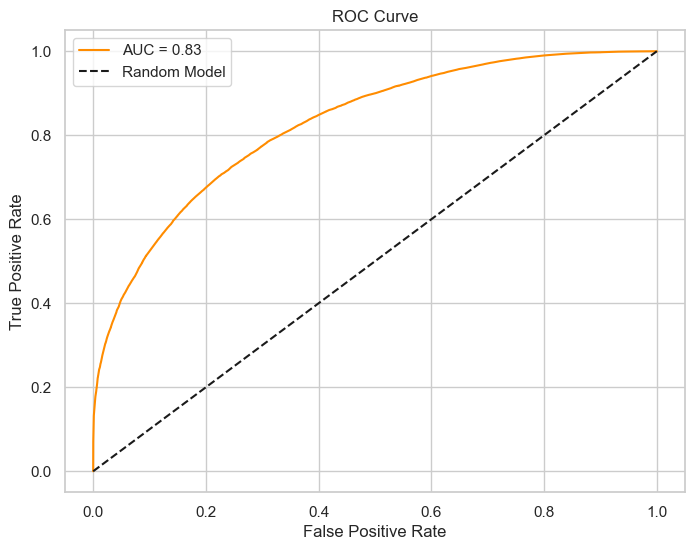

In [135]:
# Call the ROC function
fpr, tpr, thresholds, auc_score = plot_roc(y_train_final, y_train_pred_prob)

**Sensitivity and Specificity tradeoff**

Check sensitivity and specificity tradeoff to find the optimal cutoff point.

7.3.2 Predict on training set at various probability cutoffs <font color="red">[1 Mark]</font>

In [142]:
# Predict on training data by creating columns with different probability cutoffs to explore the impact of cutoff on model performance

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    train_results_df[i]= train_results_df.Predicted_Probability.map(lambda x: 1 if x > i else 0)
train_results_df.head()

Actual  Predicted_Probability  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  \
41465       0               0.041969          0    1    0    0    0    0    0   
69350       0               0.165156          0    1    1    0    0    0    0   
28247       0               0.262070          0    1    1    1    0    0    0   
3217        0               0.785798          1    1    1    1    1    1    1   
73636       0               0.192069          0    1    1    0    0    0    0   

       0.6  0.7  0.8  0.9  
41465    0    0    0    0  
69350    0    0    0    0  
28247    0    0    0    0  
3217     1    1    0    0  
73636    0    0    0    0

7.3.3 Plot for accuracy, sensitivity, specificity at different probability cutoffs <font color="red">[2 Marks]</font>

In [146]:
# Create a DataFrame to see the values of accuracy, sensitivity, and specificity at different values of probability cutoffs
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(train_results_df.Actual, train_results_df[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.521499  1.000000  0.000000
0.1   0.1  0.590628  0.994687  0.150260
0.2   0.2  0.658260  0.964165  0.324866
0.3   0.3  0.704534  0.906535  0.484382
0.4   0.4  0.731312  0.840838  0.611945
0.5   0.5  0.739159  0.754896  0.722009
0.6   0.6  0.731211  0.645065  0.825098
0.7   0.7  0.704676  0.526779  0.898559
0.8   0.8  0.659069  0.385612  0.957099
0.9   0.9  0.588828  0.218732  0.992181


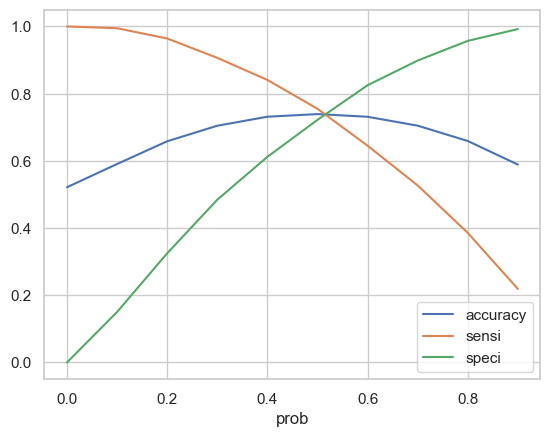

In [148]:
# Plot accuracy, sensitivity, and specificity at different values of probability cutoffs
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

7.3.4 Create a column for final prediction based on the optimal cutoff <font color="red">[2 Marks]</font>

In [154]:
# Create a column for final prediction based on the optimal cutoff
# from the above plot I got optimal cutoff approx 0.5
train_results_df['final_predicted'] = train_results_df.Predicted_Probability.map( lambda x: 1 if x > 0.5 else 0)

train_results_df.head()

Actual  Predicted_Probability  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  \
41465       0               0.041969          0    1    0    0    0    0    0   
69350       0               0.165156          0    1    1    0    0    0    0   
28247       0               0.262070          0    1    1    1    0    0    0   
3217        0               0.785798          1    1    1    1    1    1    1   
73636       0               0.192069          0    1    1    0    0    0    0   

       0.6  0.7  0.8  0.9  final_predicted  
41465    0    0    0    0                0  
69350    0    0    0    0                0  
28247    0    0    0    0                0  
3217     1    1    0    0                1  
73636    0    0    0    0                0

7.3.5 Calculate model's accuracy <font color="red">[1Mark]</font>

In [156]:
# Calculate the accuracy
metrics.accuracy_score(train_results_df.Actual	,train_results_df.final_predicted)

0.7391594531186797

7.3.6 Create confusion matrix <font color="red">[1Mark]</font>

In [158]:
# Create the confusion matrix once again
confusion2 = metrics.confusion_matrix(train_results_df.Actual	,train_results_df.final_predicted)
confusion2

array([[17082,  6577],
       [ 6320, 19465]], dtype=int64)

7.3.7 Create variables for true positive, true negative, false positive and false negative <font color="red">[1Mark]</font>

In [160]:
# Create variables for true positive, true negative, false positive and false negative
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

7.3.8 Calculate sensitivity and specificity of the model <font color="red">[1Mark]</font>

In [162]:
# Calculate Sensitivity
TP / float(TP+FN)

0.7548962575140585

In [164]:
# Calculate Specificity
TN / float(TN+FP)

0.7220085379770912

7.3.9 Calculate precision and recall of the model <font color="red">[1Mark]</font>

In [168]:
# Calculate Precision
TP / (TP + FP)

0.7474464326856616

In [170]:
# Calculate Recall
TP / (TP + FN)

0.7548962575140585

**Precision and Recall tradeoff**

Check optimal cutoff value by plotting precision-recall curve, and adjust the cutoff based on the precision and recall tradeoff if required.

In [172]:
# Import precision-recall curve function
from sklearn.metrics import precision_recall_curve

In [182]:
# Check actual and predicted values from initial model
train_results_df[['Actual', 'Predicted']]

Actual  Predicted
41465       0          0
69350       0          0
28247       0          0
3217        0          1
73636       0          0
...       ...        ...
39742       1          1
7084        0          0
58283       0          1
1679        0          1
17472       1          1

[49444 rows x 2 columns]

7.3.10 Plot precision-recall curve <font color="red">[2 Marks]</font>

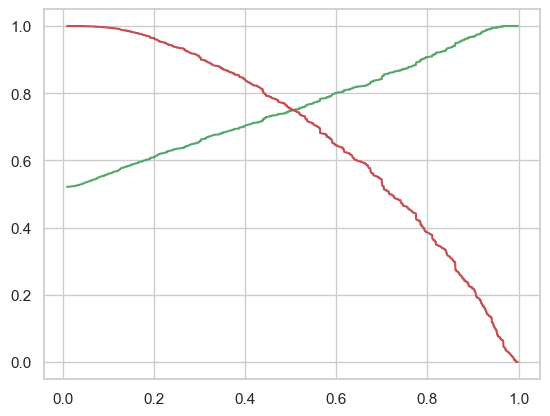

In [184]:
# Plot precision-recall curve
p, r, thresholds = precision_recall_curve(train_results_df.Actual, train_results_df.Predicted_Probability)
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

## **8. Prediction and Model Evaluation** <font color = red>[30 marks]</font>

Use the model from the previous step to make predictions on the validation set with the optimal cutoff. Then evaluate the model's performance using metrics such as accuracy, sensitivity, specificity, precision, and recall.

### **8.1 Make predictions over validation set** <font color = red>[15 marks]</font>

8.1.1 Select relevant features for validation set <font color="red">[2 Marks]</font>



In [186]:
# Select the relevant features for validation set
X_test_final = X_test_final[col]
X_test_final.head()


Gender_Male  Work-Life Balance_Fair  Work-Life Balance_Poor  \
23813            1                       0                       0   
14537            1                       1                       0   
45192            1                       0                       1   
13765            0                       0                       1   
3411             1                       0                       0   

       Job Satisfaction_Low  Job Satisfaction_Very High  \
23813                     0                           1   
14537                     0                           0   
45192                     0                           0   
13765                     1                           0   
3411                      0                           0   

       Performance Rating_Below Average  Performance Rating_Low  Overtime_Yes  \
23813                                 0                       0             0   
14537                                 0                       0             0   
45192                                 0                       0             0   
13765                                 0                       0             1   
3411                                  0                       1             0   

       Education Level_PhD  Marital Status_Single  Job Level_Mid  \
23813                    0                      0              0   
14537                    0                      1              0   
45192                    0                      0              0   
13765                    0                      0              0   
3411                     0                      0              0   

       Job Level_Senior  Remote Work_Yes  Company Reputation_Fair  \
23813                 1                0                        0   
14537                 0                1                        0   
45192                 0                0                        0   
13765                 0                0                        1   
3411                  1                0                        0   

       Company Reputation_Poor  
23813                        0  
14537                        1  
45192                        0  
13765                        0  
3411                         0

8.1.2 Add constant to X_validation <font color="red">[2 Marks]</font>

In [188]:
# Add constant to X_validation
X_test_final = sm.add_constant(X_test_final)

8.1.3 Make predictions over validation set <font color="red">[3 Marks]</font>

In [192]:
# Make predictions on the validation set and store it in the variable 'y_validation_pred'
y_validation_pred = result.predict(X_test_final)
# View predictions
y_validation_pred

23813    0.946923
14537    0.266727
45192    0.396343
13765    0.083073
3411     0.940507
           ...   
2935     0.769929
34620    0.167590
59046    0.842856
33090    0.774893
19820    0.941184
Length: 21191, dtype: float64

8.1.4 Create DataFrame with actual values and predicted values for validation set <font color="red">[5 Marks]</font>

In [194]:
# Convert 'y_validation_pred' to a DataFrame 'predicted_probability'
predicted_probability = pd.DataFrame(y_validation_pred)
# Convert 'y_validation' to DataFrame 'actual'
Actual = pd.DataFrame(y_test_final)
# Remove index from both DataFrames 'actual' and 'predicted_probability' to append them side by side
predicted_probability = predicted_probability.reset_index(drop=True)
Actual = Actual.reset_index(drop=True)
validation_results_df = pd.concat([Actual, predicted_probability], axis=1)
validation_results_df

Attrition         0
0              1  0.946923
1              0  0.266727
2              0  0.396343
3              0  0.083073
4              1  0.940507
...          ...       ...
21186          1  0.769929
21187          1  0.167590
21188          1  0.842856
21189          0  0.774893
21190          1  0.941184

[21191 rows x 2 columns]

In [198]:
# Renaming the column 
validation_results_df= validation_results_df.rename(columns={ 0 : 'predicted_probability'})
validation_results_df.head()

Attrition  predicted_probability
0          1               0.946923
1          0               0.266727
2          0               0.396343
3          0               0.083073
4          1               0.940507

8.1.5 Predict final prediction based on the cutoff value <font color="red">[3 Marks]</font>

In [200]:
# Make predictions on the validation set using the optimal cutoff and store it in a column 'final_prediction'
validation_results_df['final_prediction'] = validation_results_df.predicted_probability.map(lambda x: 1 if x > 0.5 else 0)
# Check the DataFrame
validation_results_df.head()

Attrition  predicted_probability  final_prediction
0          1               0.946923                 1
1          0               0.266727                 0
2          0               0.396343                 0
3          0               0.083073                 0
4          1               0.940507                 1

### **8.2 Calculate accuracy of the model** <font color = red>[2 marks]</font>

In [204]:
# Calculate the overall accuracy
metrics.accuracy_score(validation_results_df.Attrition, validation_results_df.final_prediction)

0.7364447170968808

### **8.3 Create confusion matrix and create variables for true positive, true negative, false positive and false negative** <font color = red>[5 marks]</font>

In [206]:
# Create confusion matrix
confusion2 = metrics.confusion_matrix(validation_results_df.Attrition, validation_results_df.final_prediction)
confusion2

array([[7360, 2806],
       [2779, 8246]], dtype=int64)

In [208]:
# Create variables for true positive, true negative, false positive and false negative
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

### **8.4 Calculate sensitivity and specificity** <font color = red>[4 marks]</font>

In [210]:
# Calculate sensitivity
TP / float(TP+FN)

0.7479365079365079

In [212]:
# Calculate specificity
TN / float(TN+FP)

0.7239819004524887

### **8.5 Calculate precision and recall** <font color = red>[4 marks]</font>

In [214]:
# Calculate precision
TP / (TP + FP)

0.7461093014838943

In [216]:
# Calculate recall
TP / (TP + FN)

0.7479365079365079

## Conclusion



**Training Set**
Precision: 0.7479365079365079

Recall: 0.7548962575140585

sensitivity:0.7548962575140585

specificity:0.7220085379770912

**Test Set**
Precision: 0.7461093014838943

Recall:0.7479365079365079

sensitivity:0.7479365079365079

specificity:0.7239819004524887

🔹Precision (~74.6–74.7%):
when model predicts that an employee will stay, it's correct about 75% of the time. This is good — we’re not flagging too many employees incorrectly as likely to stay.

🔹Recall (~74.8–75.5%):
The model is able to identify about 75% of the actual stayers, which means it's catching most of the loyal employees, but still missing around 25%.

The values are very close in both training and test sets → this indicates that my model is not overfitting and is performing consistently on unseen data.

🔹High Sensitivity (Recall ≈ 75%)
My model is doing well at identifying employees who will stay.

It catches around 75% of actual stayers, which is important for retention strategy — we don't want to overlook loyal employees.

🔹 Moderate Specificity (~72%)
This means the model is also doing a decent job at identifying employees who are likely to leave, though not as strong as its sensitivity.

About 72% of the actual leavers are correctly predicted.

Balanced Performance Across Train and Test Sets
All metrics are very close in both sets — this suggests the model is well-generalized and not overfitting.
